## Observations and Insights 

In [382]:
# Describe three observatoins
print(f"The first observation is that there is a positive correlation between average tumor volume and mouse weight.")
print(f"The second observation is that the tumor volume of mouse S185 decreases over time when using the Capomulin regimen.")
print(f"The third observation is that the tumor volumes are lower when using using the Capomulin and Ramicane regimen compared to Ceftamin and Infubinol.")

The first observation is that there is a positive correlation between average tumor volume and mouse weight.
The second observation is that the tumor volume of mouse S185 decreases over time when using the Capomulin regimen.
The third observation is that the tumor volumes are lower when using using the Capomulin and Ramicane regimen compared to Ceftamin and Infubinol.


In [338]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv" 
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [339]:
# Checking the number of mice.
mice_count = len(combined_data_df["Mouse ID"].unique()) 
mice_count

249

In [340]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_groups = combined_data_df.groupby('Mouse ID')
duplicate_mice = mice_groups['Mouse ID'].count()
duplicate_mice

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [341]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_df.drop_duplicates(subset='Mouse ID', keep='first', inplace=False, ignore_index=False)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [342]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(combined_data_df["Mouse ID"].unique()) 
mice_count

249

## Summary Statistics

In [343]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = pd.DataFrame(combined_data_df.groupby("Drug Regimen").count())

summary_table["Mean"] = pd.DataFrame(combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_table["Median"] = pd.DataFrame(combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_table["Variance"] = pd.DataFrame(combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_table["Standard deviation"] = pd.DataFrame(combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_table["SEM"] = pd.DataFrame(combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_table = summary_table[["Mouse ID", "Mean", "Median", "Standard deviation", "Variance", "SEM"]]

summary_table = summary_table.rename(columns = {"Mouse ID" : "Tested mice"})

summary_table


,Tested mice,Mean,Median,Standard deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

In [344]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_pt = summary_table[["Tested mice"]]
total_mice_pt.head()

,Tested mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


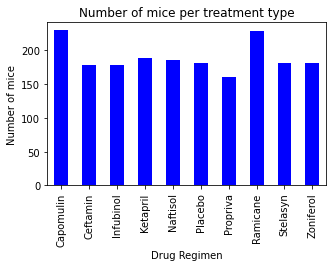

<Figure size 432x288 with 0 Axes>

In [345]:
# Use DataFrame.plot() in order to create a bar chart of the data
total_mice_pt.plot(kind="bar", figsize=(5,3), color = 'b', legend=False)

# Set a title for the chart and label axis
plt.title("Number of mice per treatment type")
plt.ylabel("Number of mice")

plt.show()
plt.tight_layout()


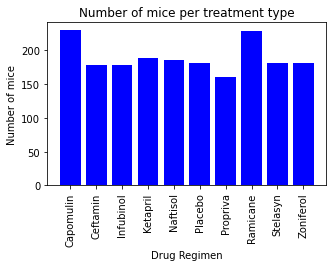

<Figure size 432x288 with 0 Axes>

In [346]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(total_mice_pt))
y_axis = summary_table["Tested mice"]
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(5,3))
plt.bar(x_axis, y_axis, color='b', align="center")
plt.xticks(tick_locations, summary_table.index.values, rotation="vertical")

# Set a Title and labels
plt.title("Number of mice per treatment type")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

plt.show()
plt.tight_layout()


In [349]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = combined_data_df.groupby('Sex')
gender_count = mice_gender['Mouse ID'].count()

gender_count.head()

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

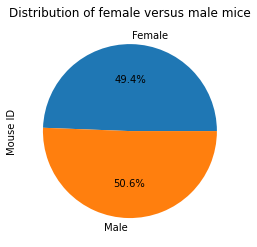

In [350]:
# Use DataFrame.plot() in order to create a bar chart of the data
panda_gender_pie = gender_count.plot(kind="pie", y='Sex', title=("Distribution of female versus male mice"),autopct='%1.1f%%')
plt.show()

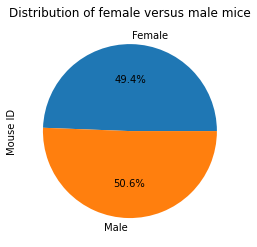

In [351]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = gender_count.index

# The values of each section of the pie chart
sizes = gender_count

# Chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of female versus male mice")
plt.ylabel("Mouse ID")

plt.show()

## Quartiles, Outliers and Boxplots

In [352]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Create DF for each selected regimen
cap = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin', :]
ram = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Ramicane', :]
inf = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Infubinol', :]
cef = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Ceftamin', :]

In [353]:
# Append all dfs into one df
append = cap.append(ram)
append_2 = append.append(inf)
append_3 = append_2.append(cef)
append_3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [354]:
# Sort by timepoint from highest to lowest
sort_timepoint = append_3.sort_values(by='Timepoint', ascending=False)
sort_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
360,g316,Capomulin,Female,22,22,45,40.159220,2
74,m546,Ramicane,Male,18,16,45,30.564625,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1024,k210,Ceftamin,Male,15,28,0,45.000000,0
185,j989,Ramicane,Male,8,19,0,45.000000,0
175,i177,Ramicane,Male,10,18,0,45.000000,0
165,a644,Ramicane,Female,7,17,0,45.000000,0


In [355]:
# Drop duplicate mice ID and keep first (highest) timepoint
last_timepoint = sort_timepoint.drop_duplicates(subset='Mouse ID', keep='first')
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
360,g316,Capomulin,Female,22,22,45,40.159220,2
74,m546,Ramicane,Male,18,16,45,30.564625,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
669,c326,Infubinol,Female,18,25,5,36.321346,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [356]:
# Create summary table
summary_regimen = pd.DataFrame(last_timepoint[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]])
summary_regimen

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
1855,y865,Ceftamin,64.729837
360,g316,Capomulin,40.159220
74,m546,Ramicane,30.564625
59,s508,Ramicane,30.276232
49,g791,Ramicane,29.128472
...,...,...,...
669,c326,Infubinol,36.321346
1743,x226,Ceftamin,45.000000
1583,u153,Ceftamin,45.000000
1551,t573,Ceftamin,45.000000


In [357]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Ceftamin","Infubinol"]
treatment_list

['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']

In [358]:
# Create empty lists to fill with tumor vol data (for plotting) and to create one chart with four plots
tumor_vol = []

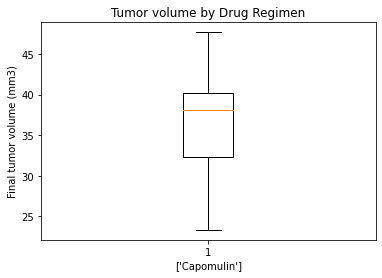

The IQR is 7.78.
Values below 20.71 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.


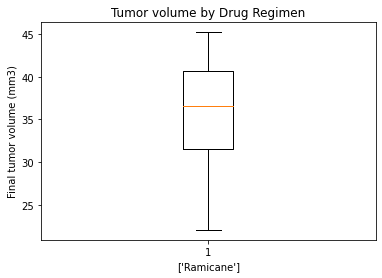

The IQR is 9.1.
Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be outliers for Ramicane.


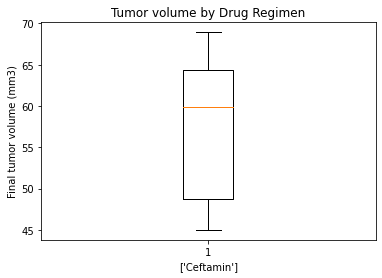

The IQR is 15.58.
Values below 25.35 could be outliers for Ceftamin.
Values above 87.67 could be outliers for Ceftamin.


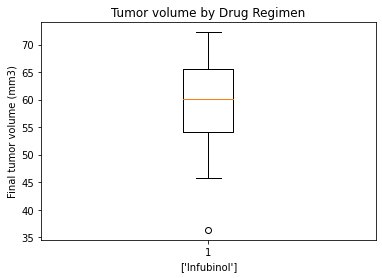

The IQR is 11.48.
Values below 36.83 could be outliers for Infubinol.
Values above 82.75 could be outliers for Infubinol.


In [413]:
# Generate the quantiles and a box plot of the final tumor volume of each mouse across four regimens of interest
for i in treatment_list:
    filterdf = summary_regimen.loc[summary_regimen["Drug Regimen"]==i]
    tumor_vol = filterdf["Tumor Volume (mm3)"]
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    fig1, ax1 = plt.subplots()
    ax1.set_title('Tumor volume by Drug Regimen')
    ax1.set_ylabel('Final tumor volume (mm3)')
    ax1.set_xlabel([i])
    ax1.boxplot(tumor_vol)
    plt.show()
    print(f"The IQR is {iqr}.")
    print(f"Values below {lower_bound} could be outliers for " + i + ".")
    print(f"Values above {upper_bound} could be outliers for " + i + ".")

In [409]:
# Create empty list for box plots
boxplots = []
for i in treatment_list:
    boxplots.append(tumor_vol)

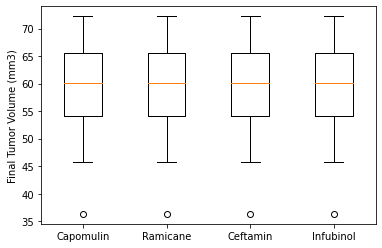

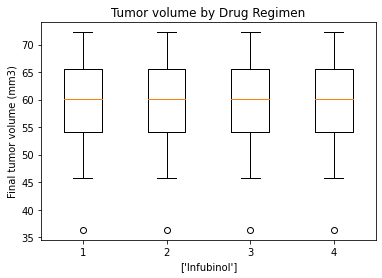

In [414]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume by Drug Regimen')
ax1.set_ylabel('Final tumor volume (mm3)')
ax1.set_xlabel([i])
ax1.boxplot(boxplots)
plt.show()
#print(f"The IQR is {iqr}.")
#print(f"Values below {lower_bound} could be outliers for " + i + ".")
#print(f"Values above {upper_bound} could be outliers for " + i + ".")

## Line and Scatter Plots

In [364]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin",:]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


<function matplotlib.pyplot.show(*args, **kw)>

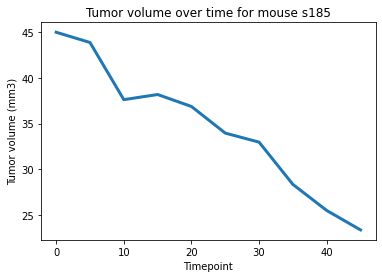

In [381]:
mouse_s185 = capomulin.loc[capomulin["Mouse ID"] =="s185",:]

time_point = mouse_s185["Timepoint"]
tumor_volume = mouse_s185["Tumor Volume (mm3)"]

capomulin_line = plt.plot(time_point, tumor_volume, linewidth=3)
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume (mm3)")
plt.title("Tumor volume over time for mouse s185")
plt.show

In [76]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capomulin.groupby(['Mouse ID']).mean()
capomulin_avg

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


Text(0.5, 1.0, 'Mouse weight versus average tumor volume - Capomulin regimen')

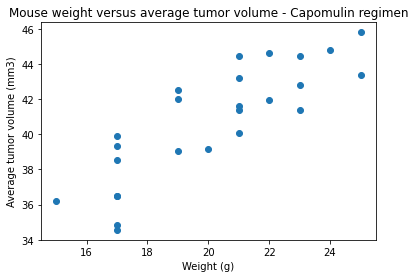

In [366]:
#Generate scatter plot
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor volume (mm3)")
plt.title("Mouse weight versus average tumor volume - Capomulin regimen")

## Correlation and Regression

In [368]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_avg["Weight (g)"]
average_tum_vol = capomulin_avg["Tumor Volume (mm3)"]
correlation = round(st.pearsonr(mouse_weight,average_tum_vol)[0],2)
print (f"The correlation coefficient is {correlation}")

The correlation coefficient is 0.84


In [369]:
# Perform a linear regression on mouse weight and average tumor volume
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(mouse_weight, average_tum_vol)

In [370]:
# Create equation of line to calculate tumor volume
mouse_fit = mouse_slope * mouse_weight + mouse_int
equation= f'y = {str(round(mouse_slope,2))}x + {str(round(mouse_int,2))}'
equation

'y = 0.95x + 21.55'

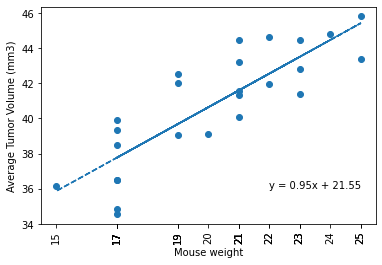

In [371]:
# Plot the linear model on top of scatter plot 
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.plot(mouse_weight, mouse_fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.xlabel('Mouse weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(equation,(22,36))
plt.show()